

*PROMOTION*


***AB Testing***

A/B testing (also known as split testing or bucket testing) is a method of comparing two versions of situations against each other to determine which one's performs better

****Importing Libraries****

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
df1 = pd.read_csv("/content/drive/My Drive/Algorithms and Digital Marketing/Final project/Dataset/Product_Details.csv")
df1.head(1)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter


In [ ]:
 df1['Total_Visits'] = np.random.randint(1, 50, df1.shape[0])

In [ ]:
df1.head(1)

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,Total_Visits
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter,9


In [ ]:
df1[['reviews.username','id','Total_Visits']].shape

(34660, 3)

In [ ]:
df1['Total_Visits'] = np.random.randint(1, 50, df1.shape[0])

In [ ]:
df1.head(1)

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,Total_Visits
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter,39


In [ ]:
df1['Total_Price'] = np.random.randint(100,1200,size=34660)/10

In [ ]:
df1.head(1)

,userID,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.didPurchase,membershipStatus,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,Total_Visits,Total_Price
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter,32,96.3


In [ ]:
df1.rename(columns = {'reviews.doRecommend':'membershipStatus'}, inplace = True)

In [ ]:
df1.head(1)

,userID,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.didPurchase,membershipStatus,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,Total_Visits,Total_Price
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter,32,96.3


In [ ]:
df1.count()

userID                  34660
name                    27900
asins                   34658
brand                   34660
categories              34660
keys                    34660
manufacturer            34660
reviews.date            34621
reviews.dateAdded       24039
reviews.dateSeen        34660
reviews.didPurchase         1
membershipStatus        34066
reviews.id                  1
reviews.numHelpful      34131
reviews.rating          34627
reviews.sourceURLs      34660
reviews.text            34659
reviews.title           34655
reviews.userCity            0
reviews.userProvince        0
reviews.username        34658
Total_Visits            34660
Total_Price             34660
dtype: int64

In [ ]:
df1.rename(columns = {'id':'userID'}, inplace = True)

In [ ]:
df1.head(1)

,userID,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.didPurchase,membershipStatus,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,Total_Visits,Total_Price,Total_Profit
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter,39,79.0,2.6


In [ ]:
df2=df1[['userID','reviews.username','brand','Total_Visits','Total_Price','membershipStatus','reviews.rating']]

**Users are randomly assigned to two groups:**

***Type1:*** Customer's with Amazon Memebership
**Type2:** Customer's without Amazon Membership 

In [ ]:
df2.head(5)

,userID,reviews.username,brand,Total_Visits,Total_Price,membershipStatus,reviews.rating
0,AVqkIhwDv8e3D1O-lebb,Adapter,Amazon,39,79.0,True,5.0
1,AVqkIhwDv8e3D1O-lebb,truman,Amazon,18,49.7,True,5.0
2,AVqkIhwDv8e3D1O-lebb,DaveZ,Amazon,2,27.7,True,5.0
3,AVqkIhwDv8e3D1O-lebb,Shacks,Amazon,12,25.2,True,4.0
4,AVqkIhwDv8e3D1O-lebb,explore42,Amazon,29,110.4,True,5.0


In [ ]:
df2['membershipStatus'].value_counts()

True     32682
False     1384
Name: membershipStatus, dtype: int64

**Calculating Total Profit of each Customer**

In [ ]:
df2['Total_Profit'] = np.random.randint(20,30,size=34660)/10

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df2.head(5)

,userID,reviews.username,brand,Total_Visits,Total_Price,membershipStatus,reviews.rating,Total_Profit
0,AVqkIhwDv8e3D1O-lebb,Adapter,Amazon,39,79.0,True,5.0,2.1
1,AVqkIhwDv8e3D1O-lebb,truman,Amazon,18,49.7,True,5.0,2.5
2,AVqkIhwDv8e3D1O-lebb,DaveZ,Amazon,2,27.7,True,5.0,2.9
3,AVqkIhwDv8e3D1O-lebb,Shacks,Amazon,12,25.2,True,4.0,2.1
4,AVqkIhwDv8e3D1O-lebb,explore42,Amazon,29,110.4,True,5.0,2.1


In [ ]:
grouped = df2.groupby('membershipStatus').agg({'Total_Profit':['count','sum']})

In [ ]:
grouped.head(5)

Total_Profit         
                        count      sum
membershipStatus                      
False                    1384   3401.8
True                    32682  80085.2

In [ ]:
Count = df1['membershipStatus'].value_counts()
Count

True     32682
False     1384
Name: membershipStatus, dtype: int64

In [ ]:
from matplotlib import pyplot as plt 
import numpy as np 

Text(0.5, 1.0, "Count of Customer's with Membership")

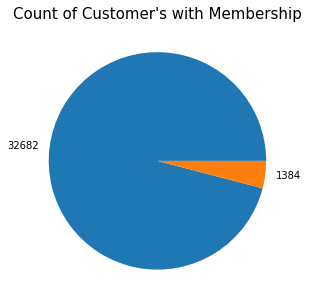

In [ ]:
fig = plt.figure(figsize =(8, 5)) 
plt.pie(Count, labels = Count)
plt.title("Count of Customer's with Membership", fontsize=15)

In [ ]:
Sum = df2.groupby('membershipStatus').agg({'Total_Profit':['sum']})
Sum

,Total_Profit
,sum
membershipStatus,
False,3401.8
True,80085.2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


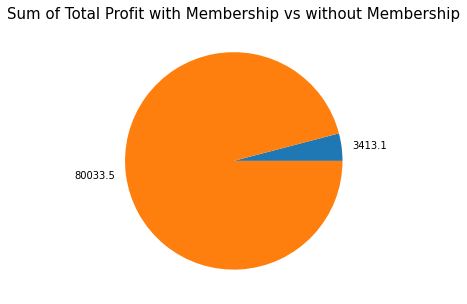

In [ ]:
# Creating dataset 
membershipStatus = ['False', 'True'] 
Total_Profit = [3413.1, 80033.5 ] 
# Creating plot 
fig = plt.figure(figsize =(8, 5)) 
plt.pie(Sum, labels = Total_Profit) 

plt.title("Sum of Total Profit with Membership vs without Membership", fontsize=15)
  
# show plot 
plt.show() 

**Type1 Customers who had Amazon Membership made more Profit than Type 2 Customer's without the Membership**